# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite, TrueResponseWithClusteringSite
from pyBasket.common import DEFAULT_DECISION_THRESHOLD, DEFAULT_DECISION_THRESHOLD_INTERIM
from pyBasket.common import MODEL_INDEPENDENT, MODEL_INDEPENDENT_BERN, MODEL_BHM, MODEL_PYBASKET

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [8]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 4

### Generate data

In [9]:
K = 6  # the number of groups
p0 = 0.2  # null response rate
p1 = 0.4  # target response rate
enrollments = [[14, 10] for _ in range(K)]
evaluate_interim = [True, True]  # evaluate every interim stage
true_response_rates = [p0, p0, p0, p0, p0, p0]

n_classes = K
n_clusters = 5
site = TrueResponseWithClusteringSite(enrollments, n_classes, n_clusters, true_response_rates=true_response_rates)
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [10]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = False

In [11]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-24 19:01:19.704 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-24 19:01:19.705 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 1/14 for Analysis independent
2023-06-24 19:01:19.705 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 1/14 for Analysis BHM
2023-06-24 19:01:19.706 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 3/14 for Analysis independent
2023-06-24 19:01:19.706 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 3/14 for Analysis BHM
2023-06-24 19:01:19.707 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 1/14 for Analysis independent
2023-06-24 19:01:19.707 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 1/14 for Analysis BHM
2023-06-24 19:01:19.708 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/14 for Analysis independent
2023-06-24 19:01:19.708 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/14 for 

### Check last results

### Simple

In [12]:
analysis_name = analysis_names[0]
analysis_name

'independent'

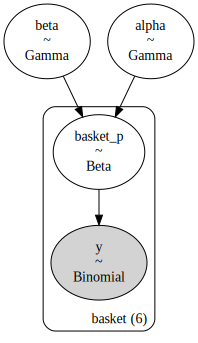

In [13]:
trial.visualise_model(analysis_name)

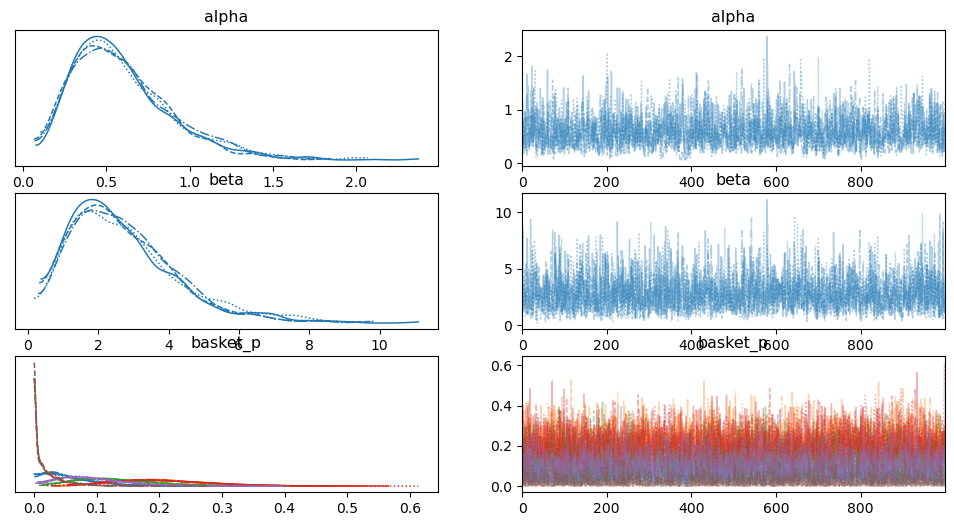

In [14]:
trial.plot_trace(analysis_name, -1)

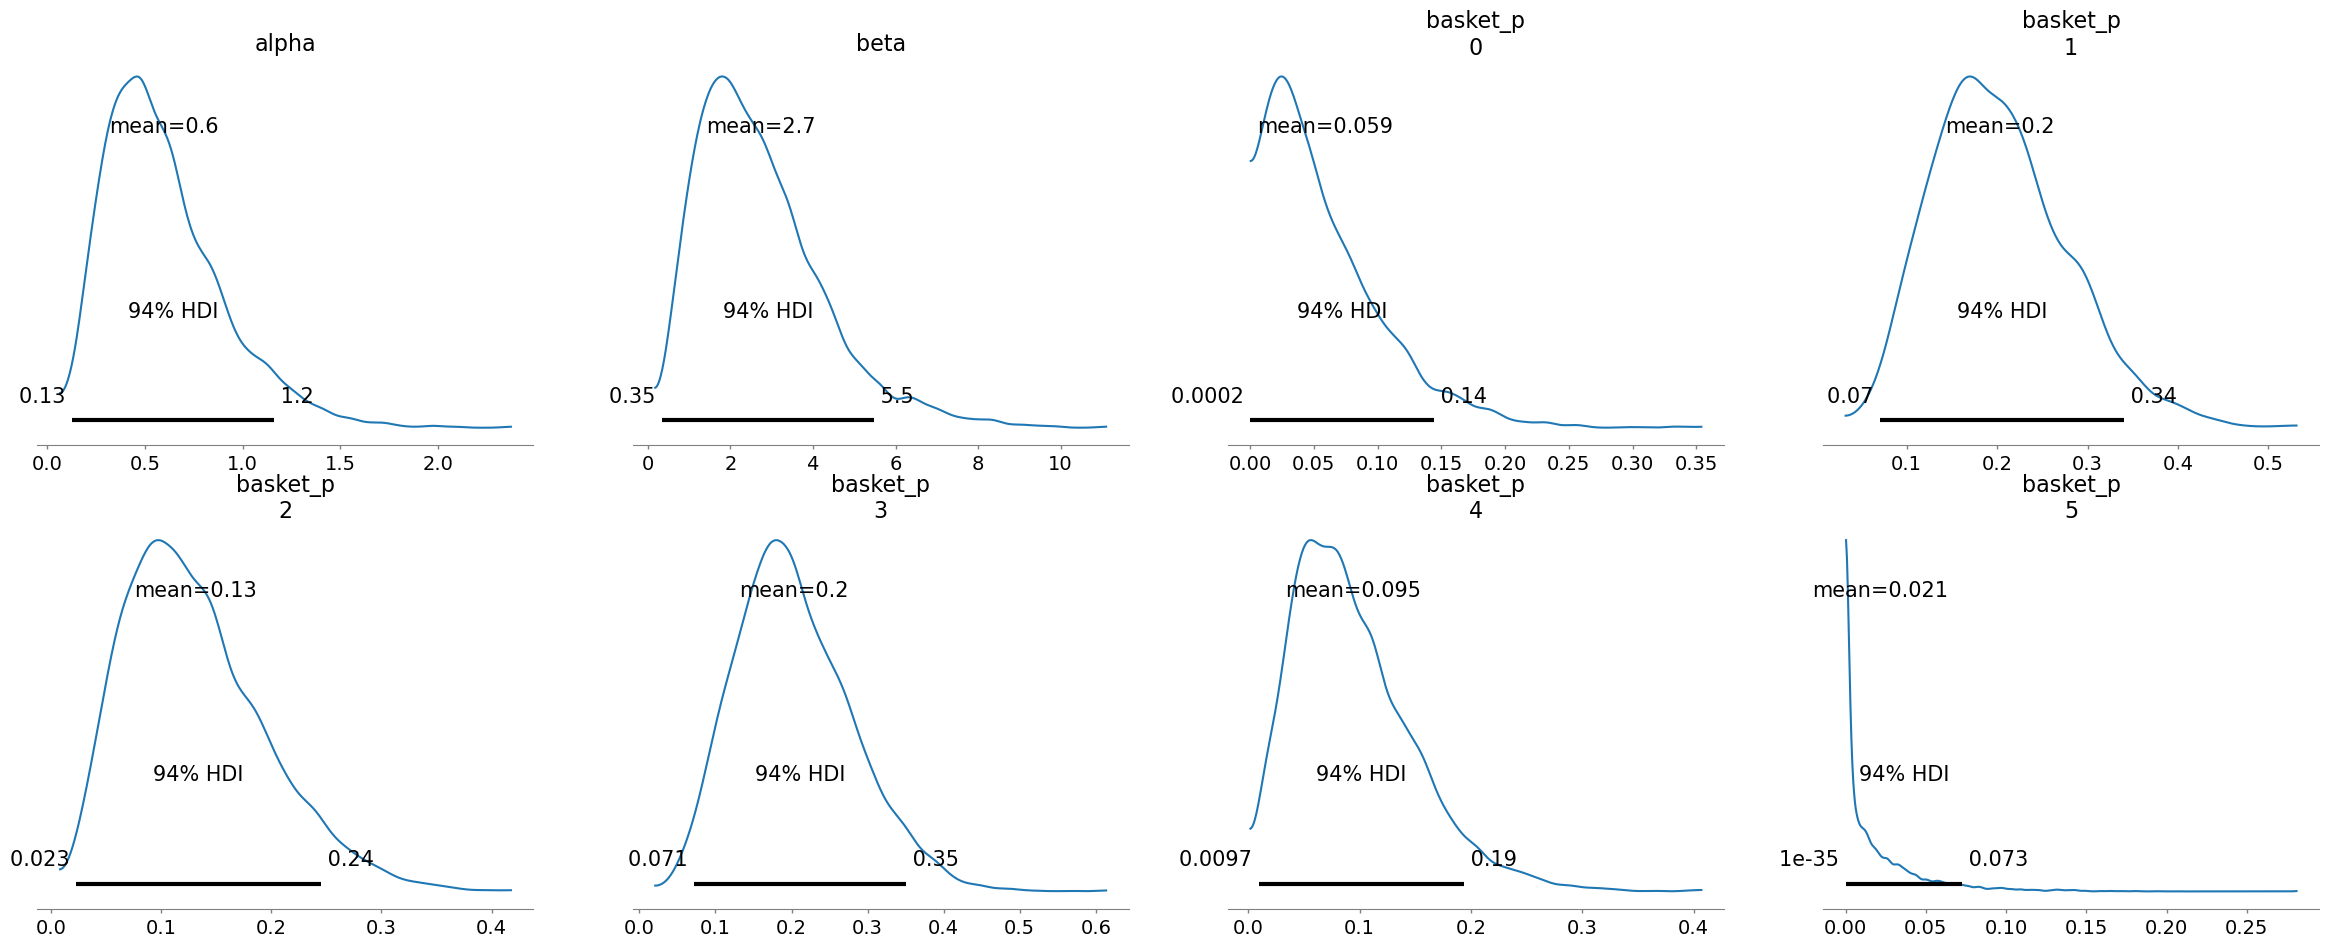

In [15]:
trial.plot_posterior(analysis_name, -1)

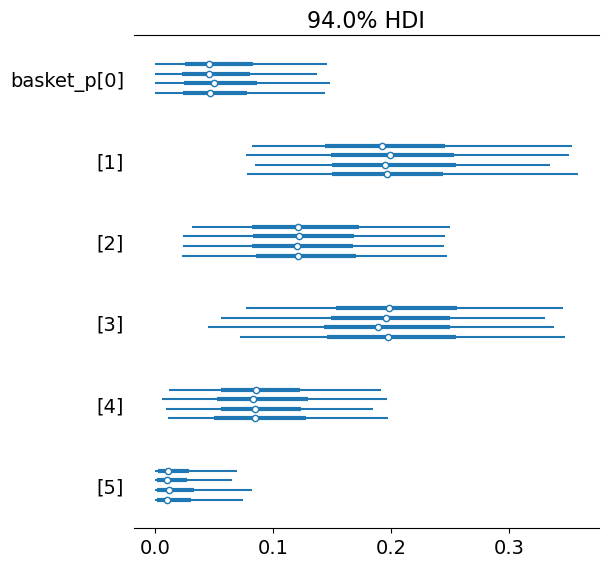

In [16]:
trial.plot_forest(analysis_name, -1)

In [17]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.01450,0.05,False,OPEN,1,14
1,0.16925,0.05,True,OPEN,3,14
2,0.01425,0.05,False,OPEN,1,14
3,0.18050,0.05,True,OPEN,3,14
4,0.01000,0.05,False,OPEN,1,14
5,0.00075,0.05,False,OPEN,0,14


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.0115,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.4760,0.9,False,COMPLETED_INEFFECTIVE,5,24
2,0.1460,0.9,False,COMPLETED_INEFFECTIVE,3,24
3,0.4740,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.0485,0.9,False,COMPLETED_INEFFECTIVE,2,24
5,0.0005,0.9,False,COMPLETED_INEFFECTIVE,0,24


In [18]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.0115,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.4760,0.9,False,COMPLETED_INEFFECTIVE,5,24
2,0.1460,0.9,False,COMPLETED_INEFFECTIVE,3,24
3,0.4740,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.0485,0.9,False,COMPLETED_INEFFECTIVE,2,24
5,0.0005,0.9,False,COMPLETED_INEFFECTIVE,0,24


### BHM

In [19]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

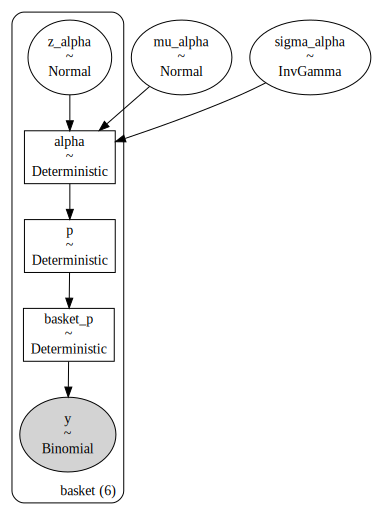

In [20]:
trial.visualise_model(analysis_name)

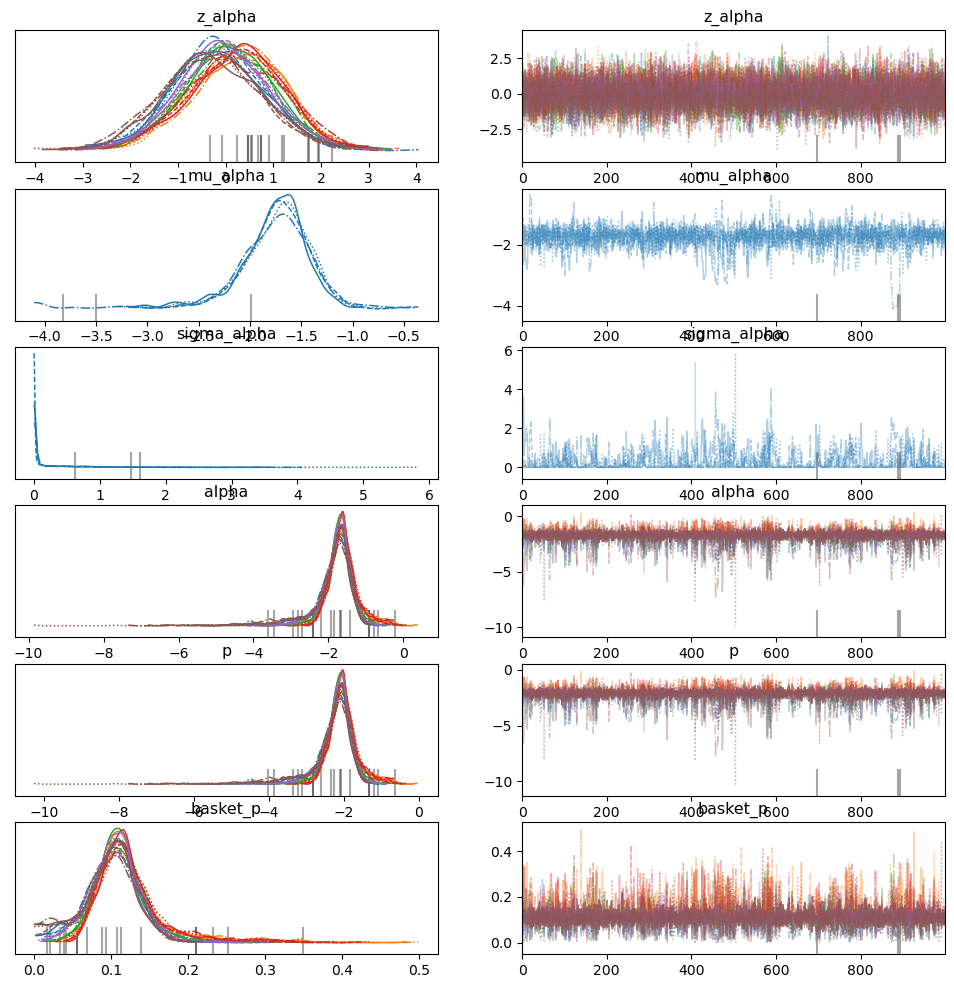

In [21]:
trial.plot_trace(analysis_name, -1)

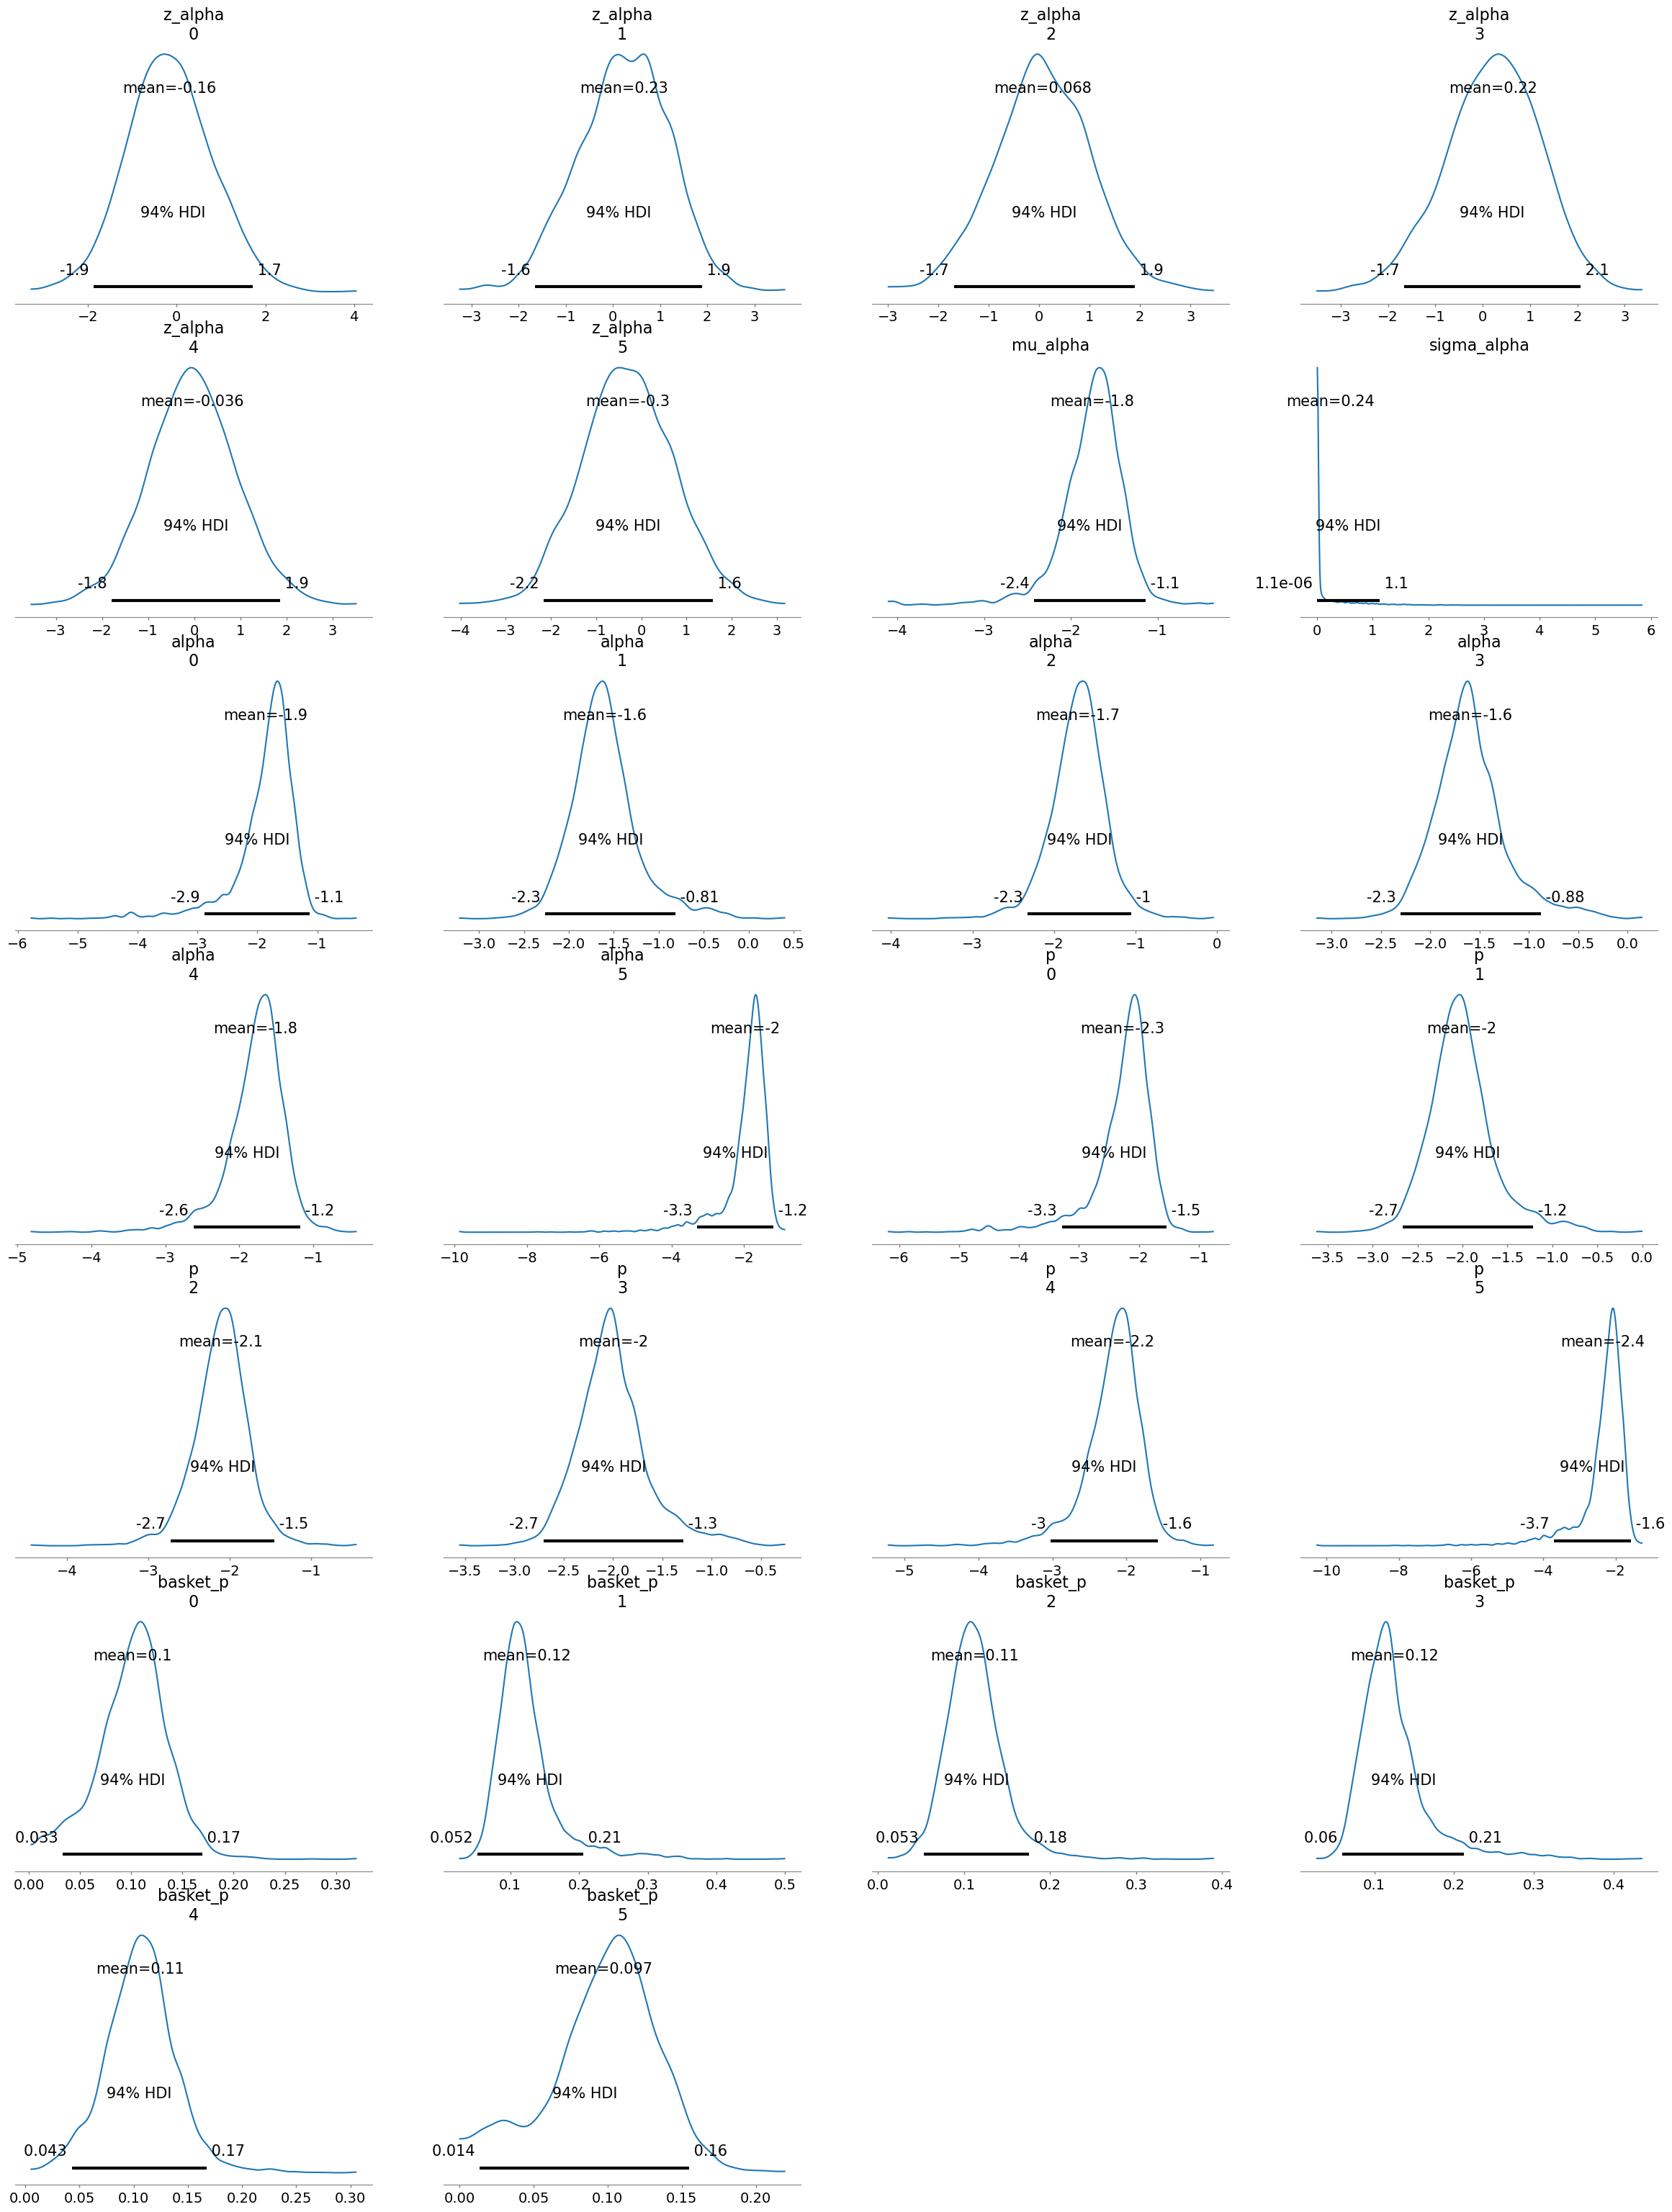

In [22]:
trial.plot_posterior(analysis_name, -1)

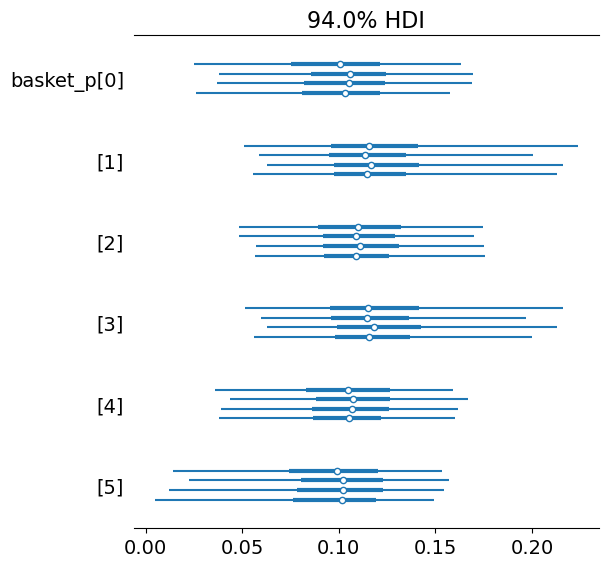

In [23]:
trial.plot_forest(analysis_name, -1)

In [24]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.00025,0.05,False,OPEN,1,14
1,0.00475,0.05,False,OPEN,3,14
2,0.00050,0.05,False,OPEN,1,14
3,0.00625,0.05,False,OPEN,3,14
4,0.00050,0.05,False,OPEN,1,14
5,0.00025,0.05,False,OPEN,0,14


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.00425,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.06225,0.9,False,COMPLETED_INEFFECTIVE,5,24
2,0.01650,0.9,False,COMPLETED_INEFFECTIVE,3,24
3,0.06400,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.00875,0.9,False,COMPLETED_INEFFECTIVE,2,24
5,0.00175,0.9,False,COMPLETED_INEFFECTIVE,0,24


In [25]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.00425,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.06225,0.9,False,COMPLETED_INEFFECTIVE,5,24
2,0.01650,0.9,False,COMPLETED_INEFFECTIVE,3,24
3,0.06400,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.00875,0.9,False,COMPLETED_INEFFECTIVE,2,24
5,0.00175,0.9,False,COMPLETED_INEFFECTIVE,0,24
